In [ ]:
from pathlib import Path
from carps.analysis.gather_data import read_jsonl_content
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from carps.analysis.utils import setup_seaborn
from omegaconf import OmegaConf
from dacboenv.experiment.collect_incumbents import add_metadata_to_dict
from tqdm import tqdm

setup_seaborn()

log_fn = "DACBOEnvActions.jsonl"
rundirs = [
    "../runs_eval/PPO-AlphaNet*"
]
filenames = []
while rundirs:
    rundir = rundirs.pop()
    if "*" in str(rundir):
        parent_dir = Path(rundir).parent
        _rundirs = list(parent_dir.glob(Path(rundir).name))
        rundirs.extend(_rundirs)
        print(rundirs)
    _fns = list(Path(rundir).glob(f"**/{log_fn}"))
    filenames.extend(_fns)

def load_actions(filenames: list[str]) -> pd.DataFrame:
    actions = []
    for rundir in tqdm(filenames):
        rundir = Path(rundir)
        cfg_fn = rundir.parent / ".hydra/config.yaml"
        cfg = OmegaConf.load(cfg_fn)
        acts = read_jsonl_content(rundir)
        policy_id = cfg.policy_id if hasattr(cfg, "policy_id") else rundir.parts[-8]
        acts["policy_id"] = policy_id
        acts = add_metadata_to_dict(acts, cfg)
        actions.append(acts)
    actions = pd.concat(actions).reset_index(drop=True)
    return actions

print(len(filenames))
actions = load_actions(filenames)
actions.to_csv("actions.csv")

# takes 3min

[PosixPath('../runs_eval/PPO-AlphaNet--dacbo_Cepisode_length_scaled_plus_logregret_AWEI-cont_Ssawei_Repisode_finished_scaled_Ibbob2d_3seeds--seed2'), PosixPath('../runs_eval/PPO-AlphaNet--dacbo_Cepisode_length_scaled_plus_logregret_AWEI-cont_Ssawei_Repisode_finished_scaled_Ibbob2d_3seeds--seed1'), PosixPath('../runs_eval/PPO-AlphaNet--dacbo_Cepisode_length_scaled_plus_logregret_AWEI-cont_Ssawei_Repisode_finished_scaled_Ibbob2d_fid8_3seeds--seed2'), PosixPath('../runs_eval/PPO-AlphaNet--dacbo_Cepisode_length_scaled_plus_logregret_AWEI-cont_Ssawei_Repisode_finished_scaled_Ibbob2d_fid8_3seeds--seed1'), PosixPath('../runs_eval/PPO-AlphaNet--dacbo_Cepisode_length_scaled_plus_logregret_AWEI-cont_Ssawei_Repisode_finished_scaled_Ibbob2d_fid8_3seeds--seed3'), PosixPath('../runs_eval/PPO-AlphaNet--dacbo_Cepisode_length_scaled_plus_logregret_AWEI-cont_Ssawei_Repisode_finished_scaled_Ibbob2d_3seeds--seed3')]
2340


100%|██████████| 2340/2340 [02:09<00:00, 18.08it/s]


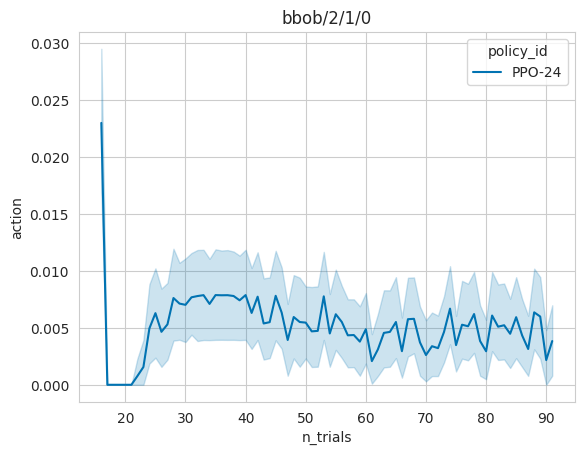

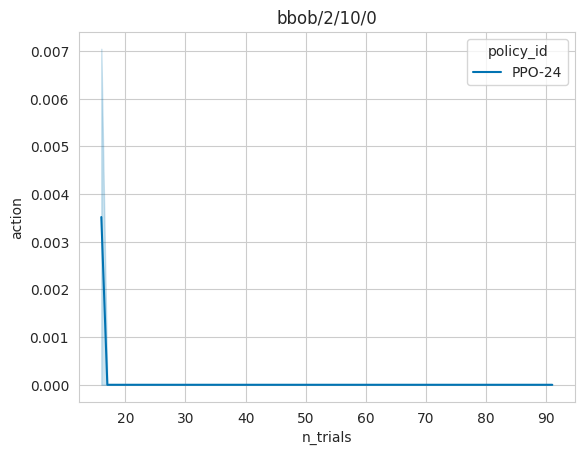

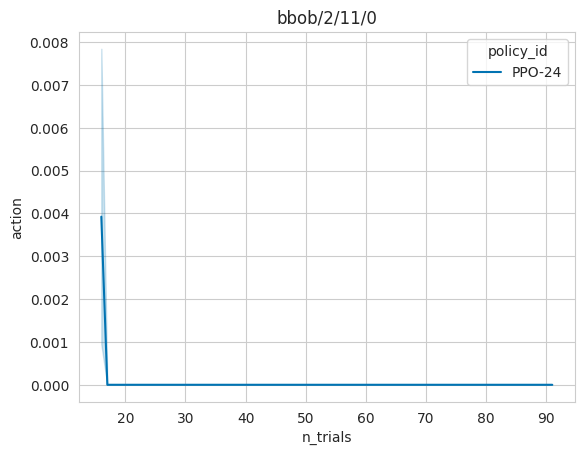

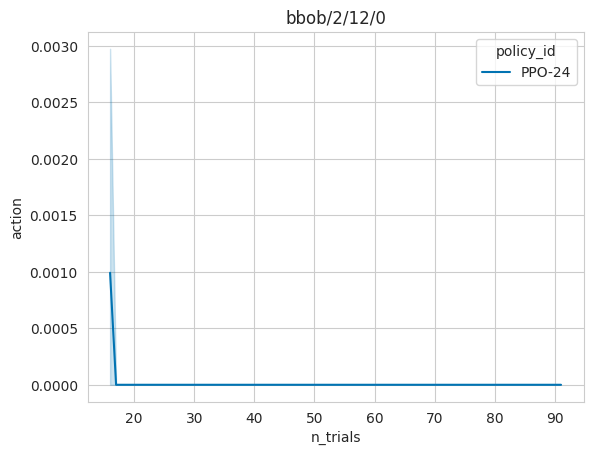

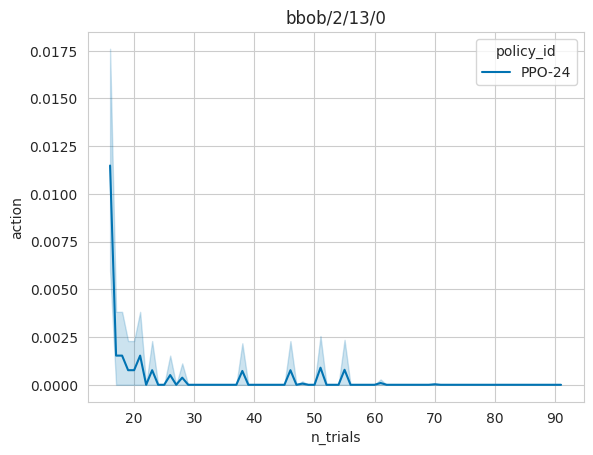

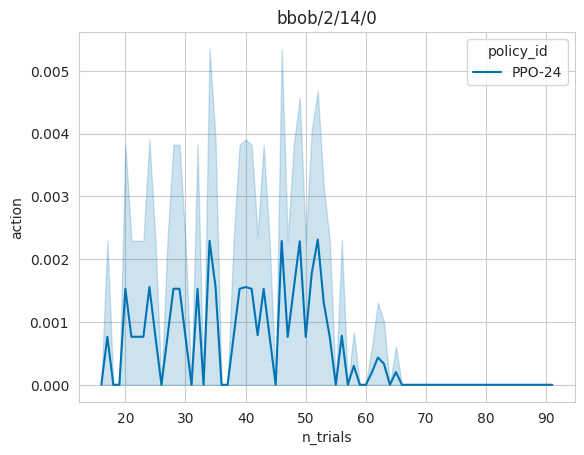

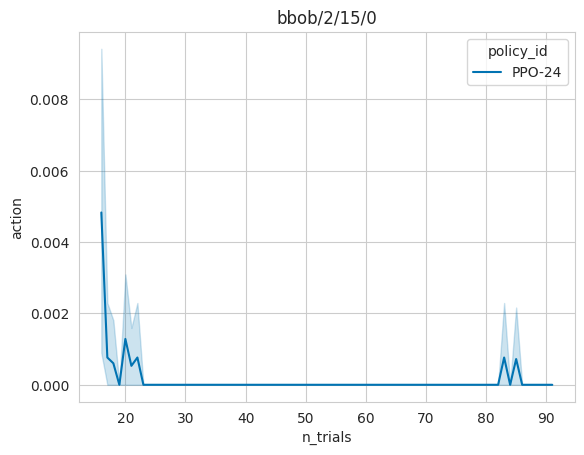

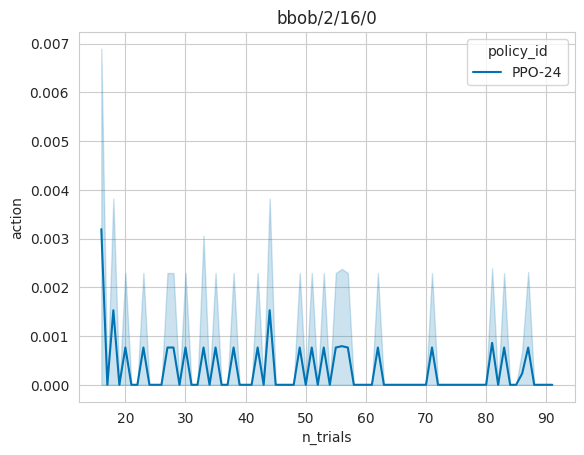

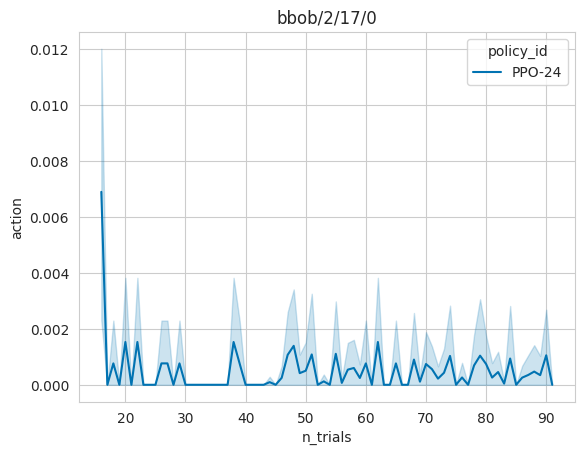

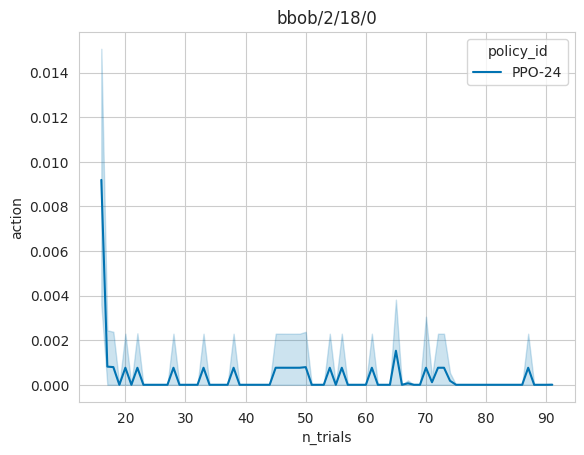

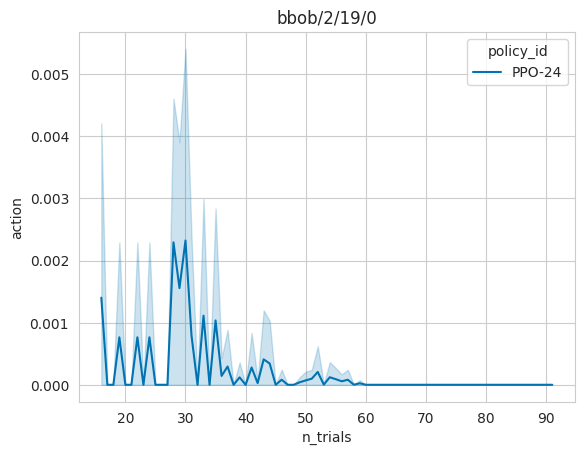

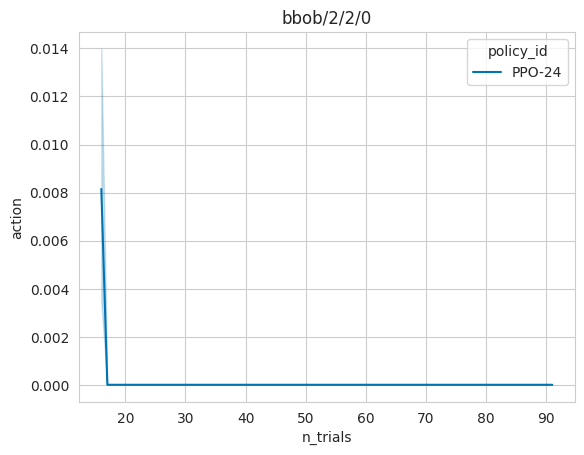

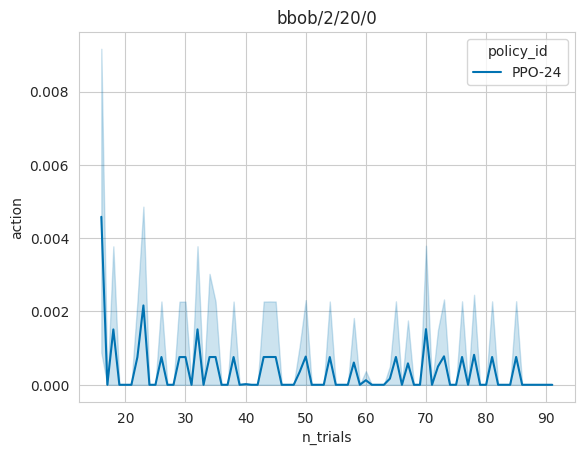

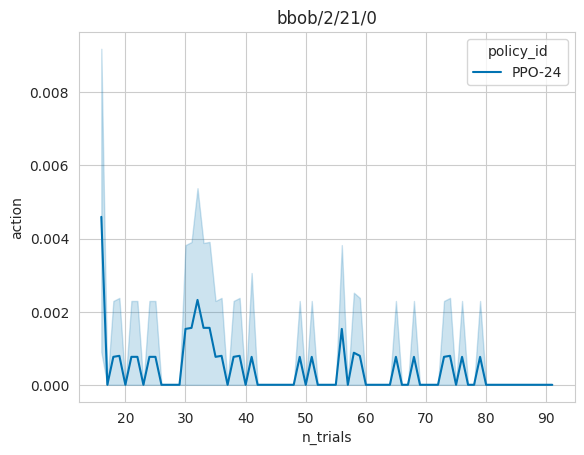

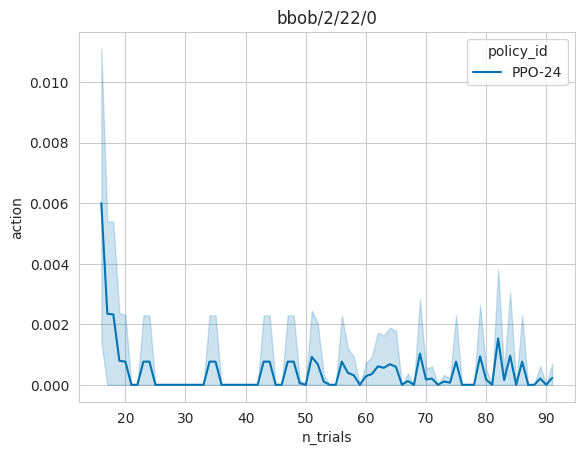

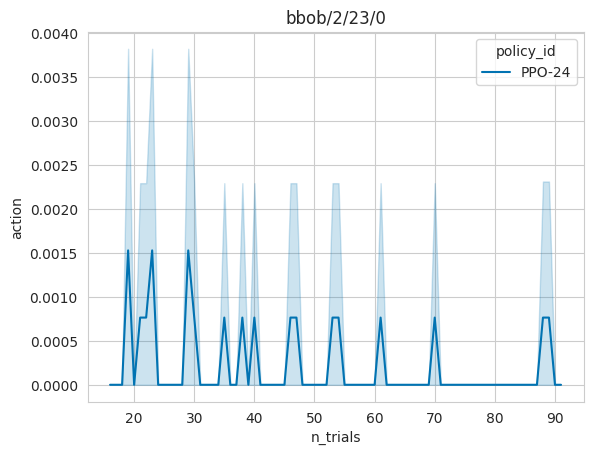

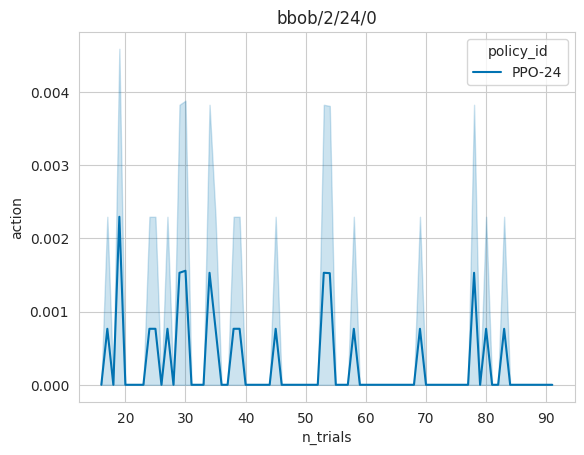

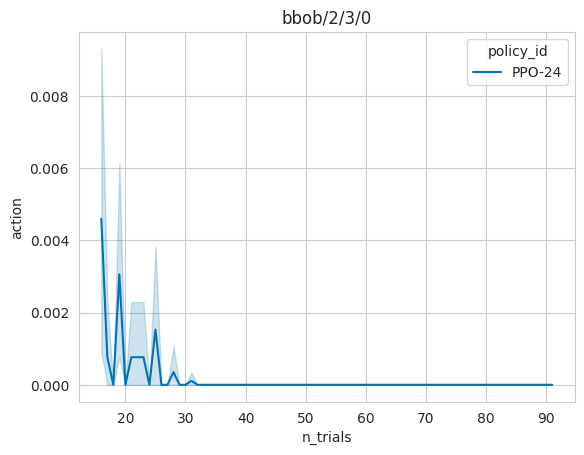

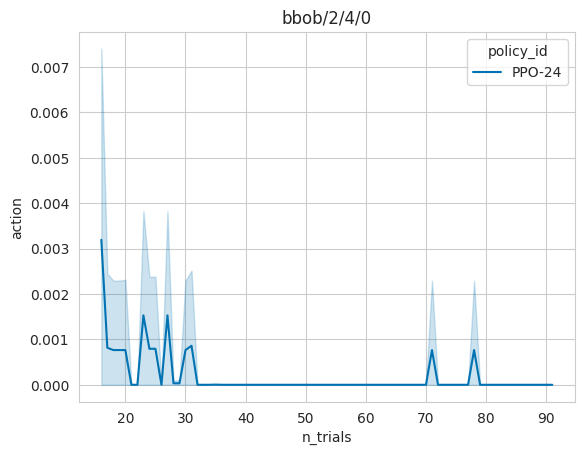

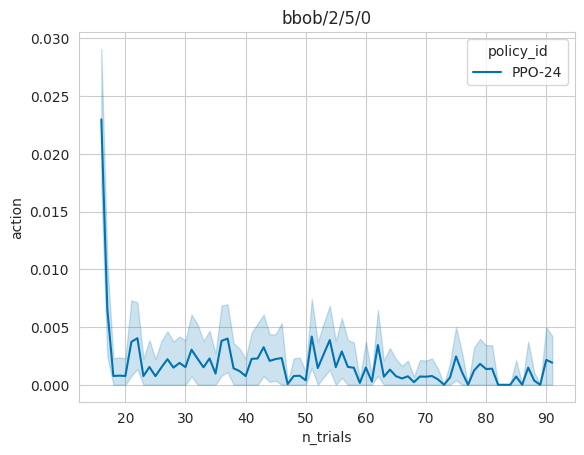

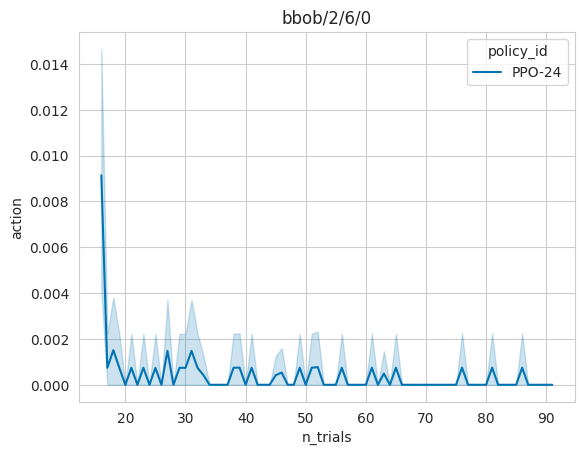

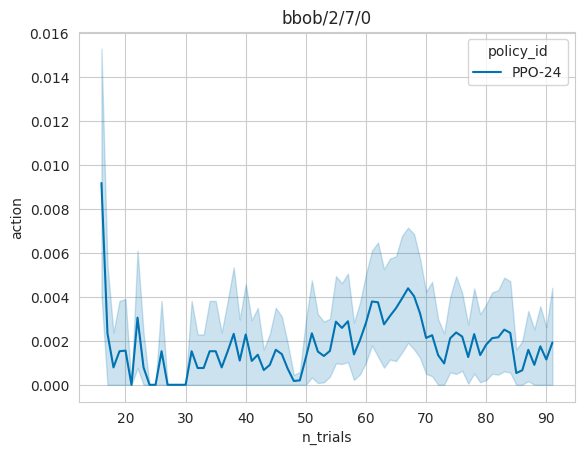

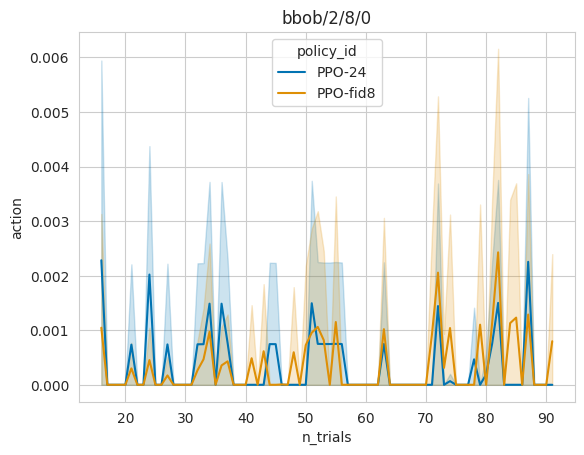

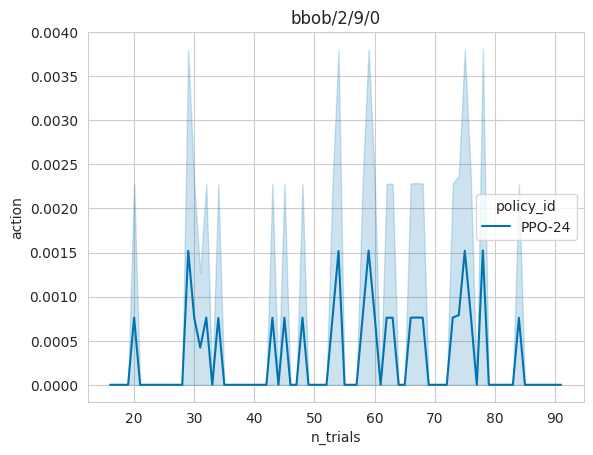

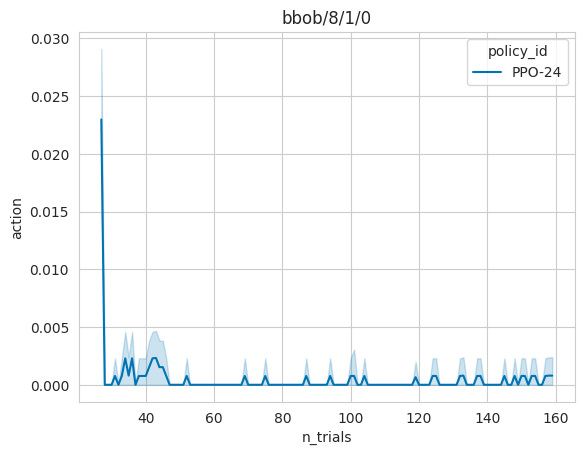

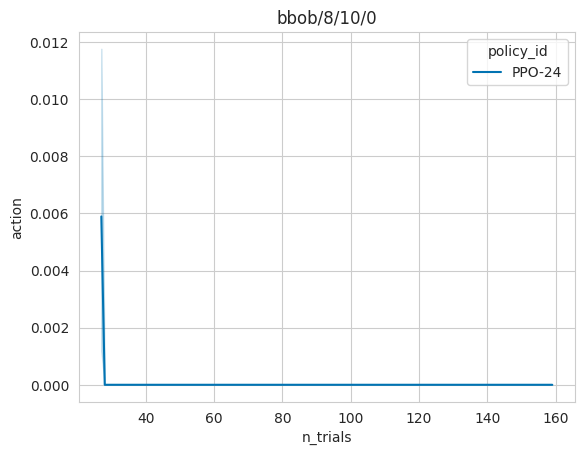

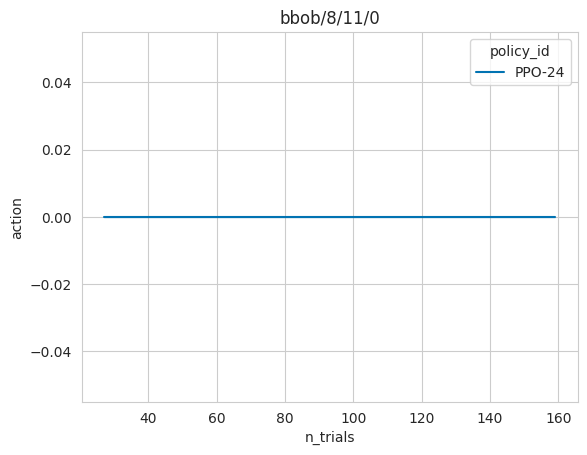

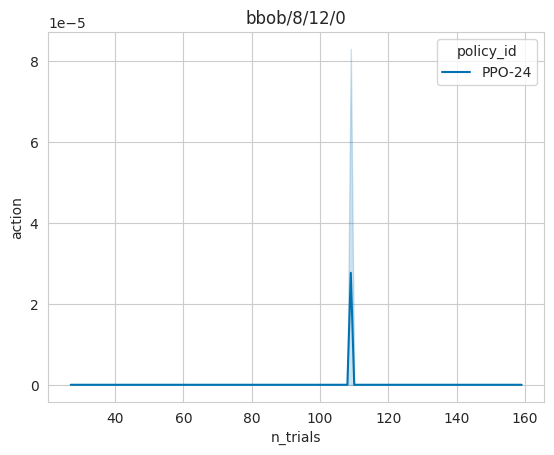

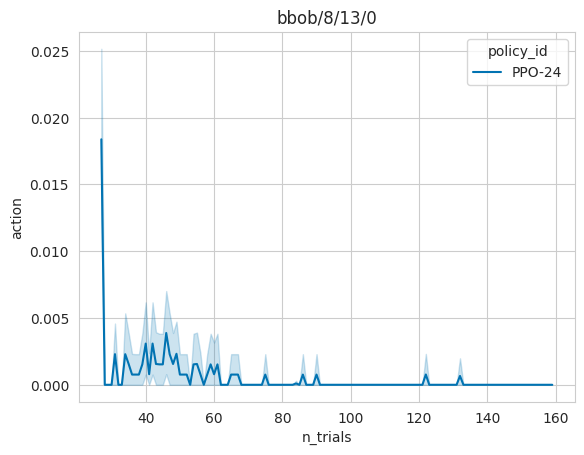

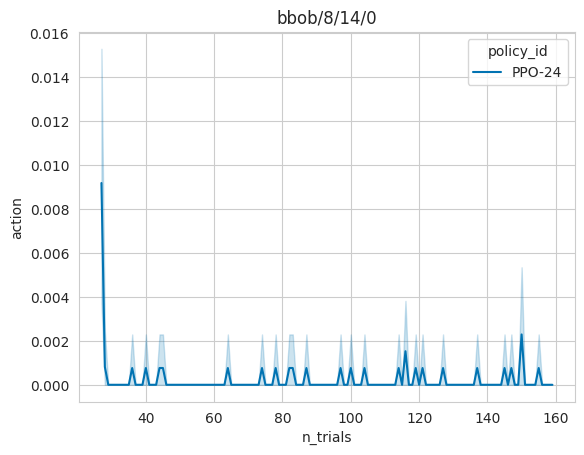

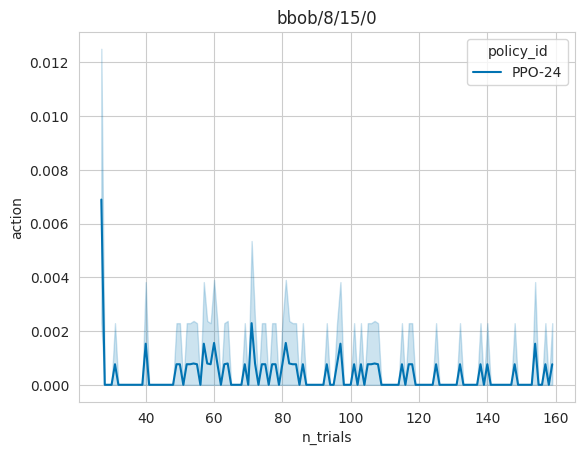

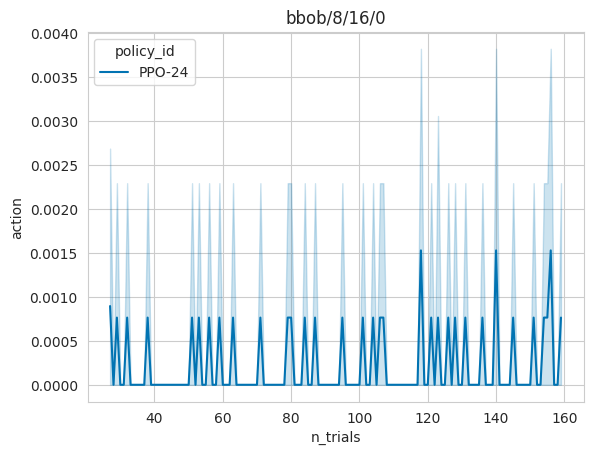

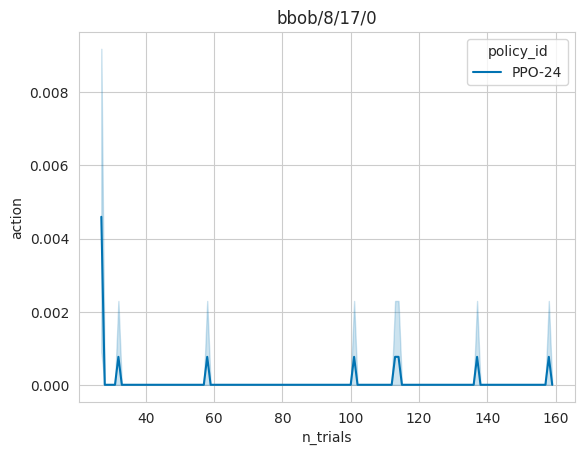

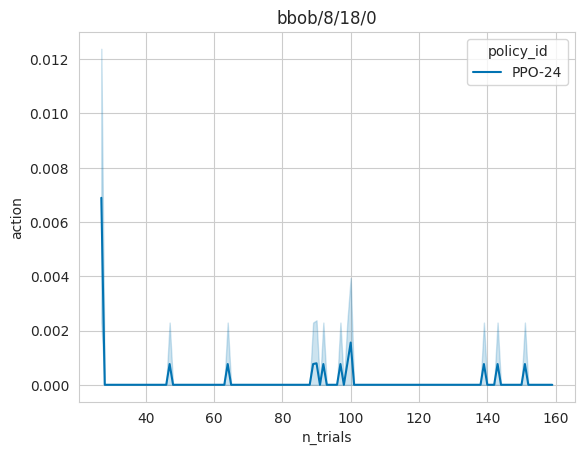

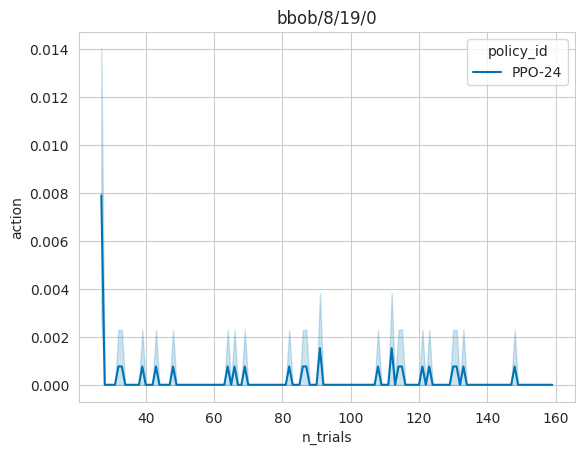

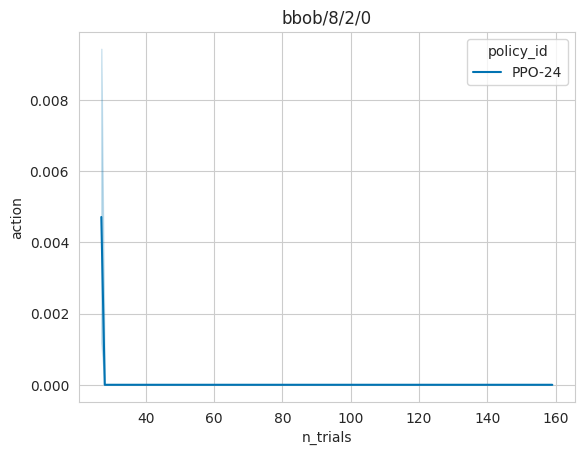

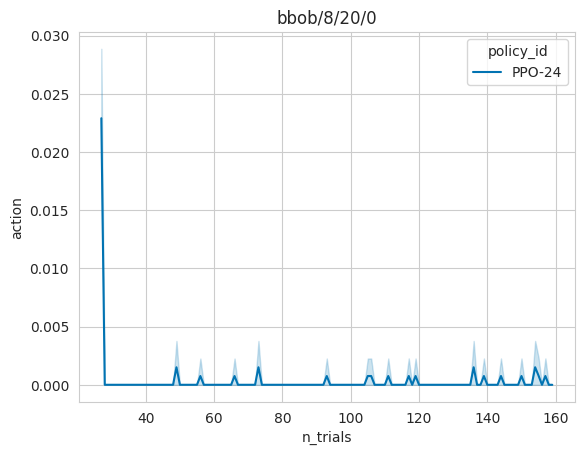

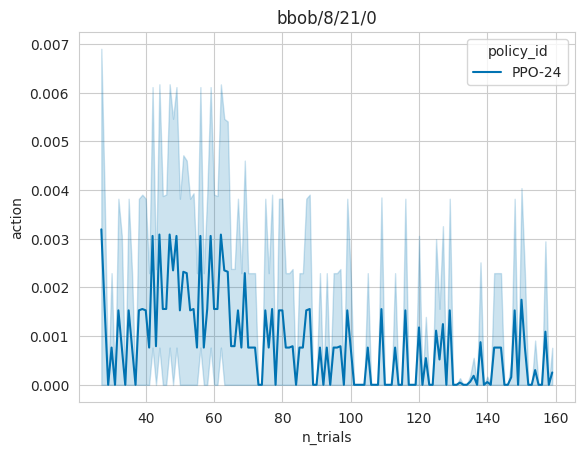

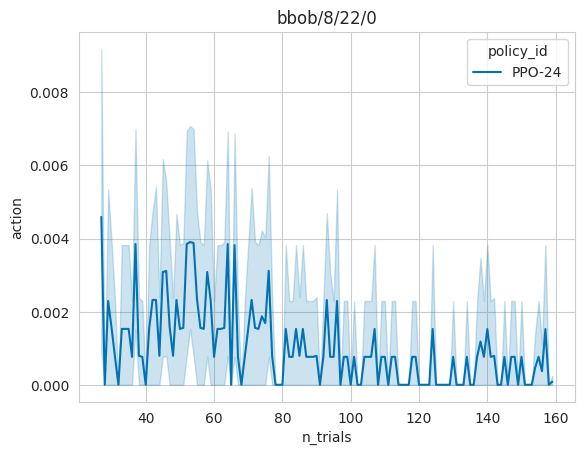

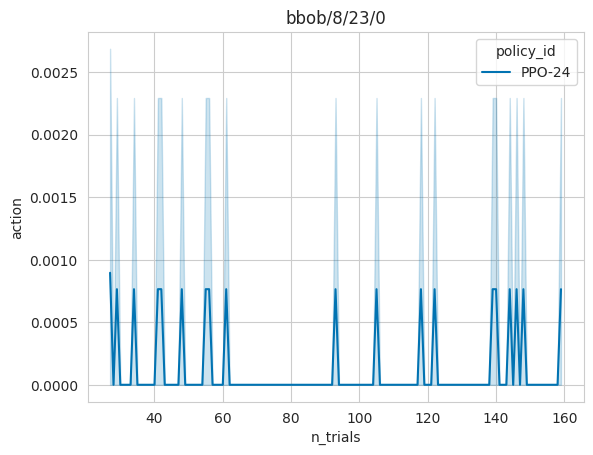

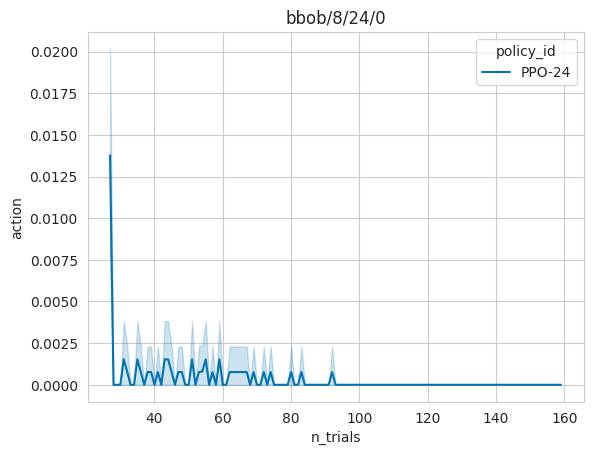

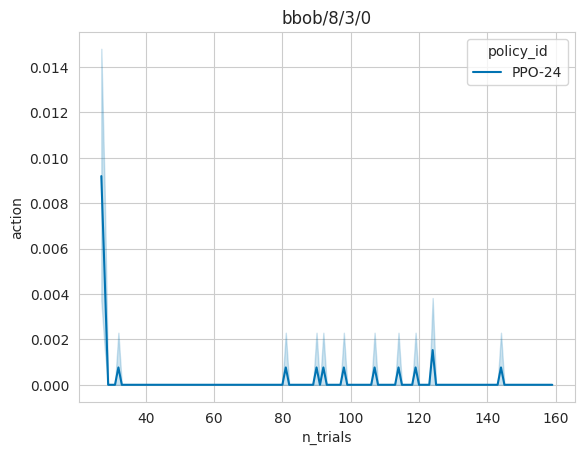

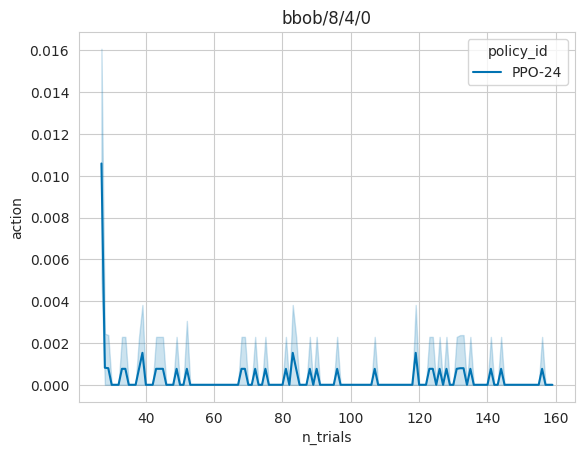

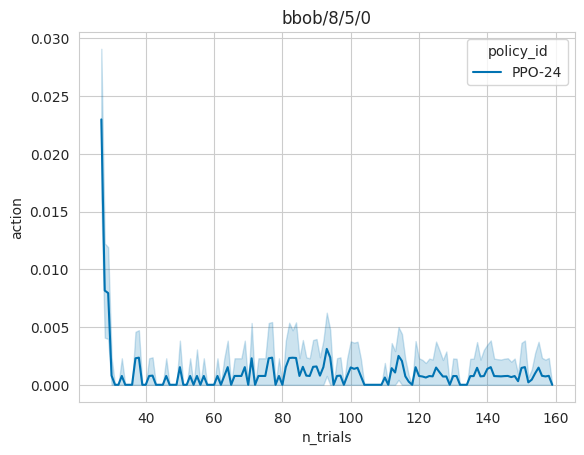

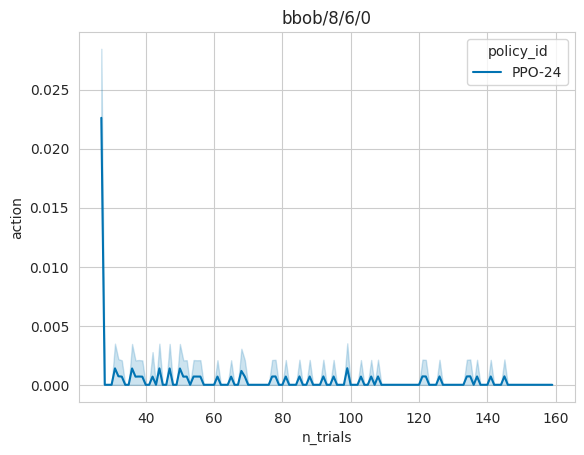

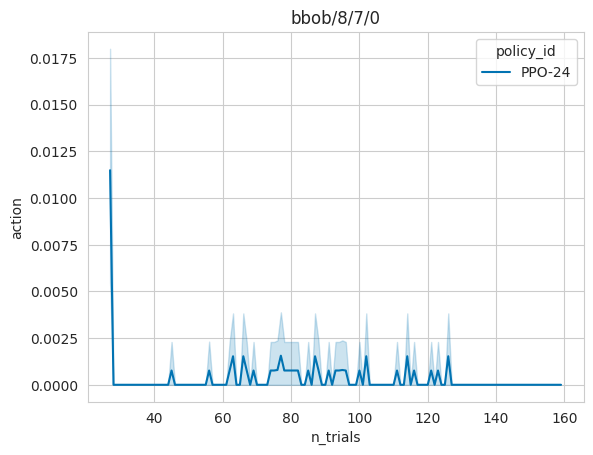

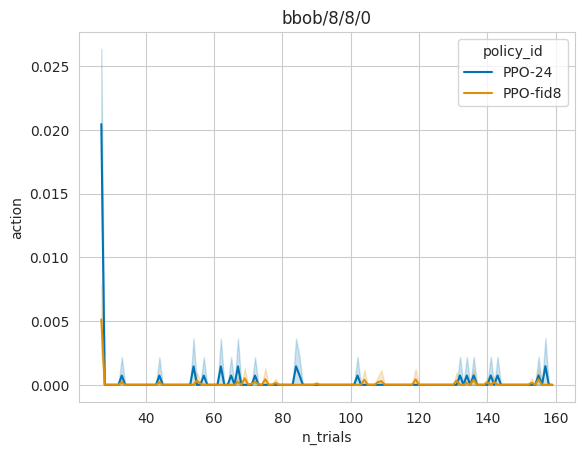

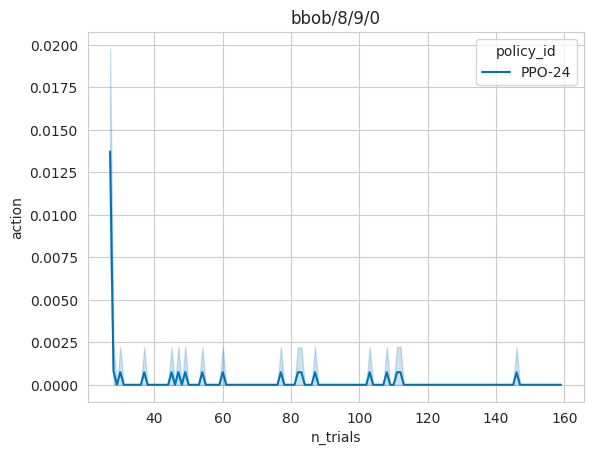

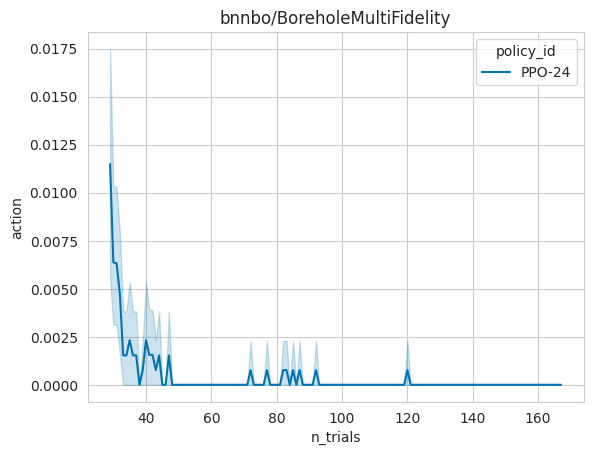

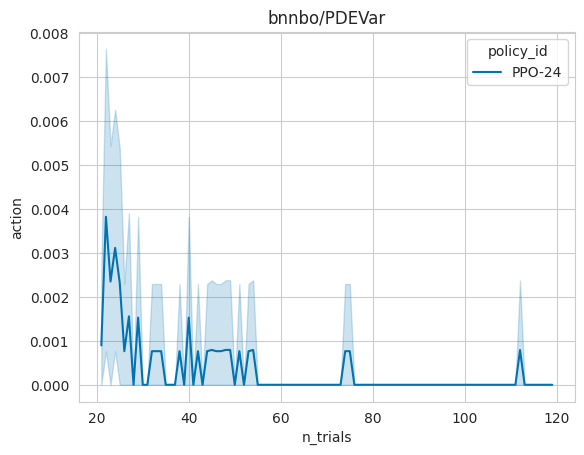

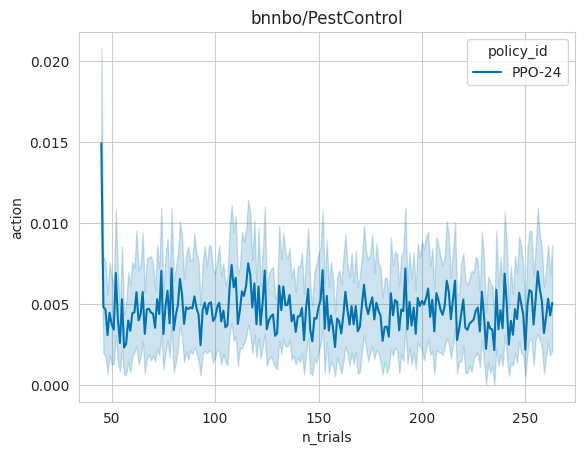

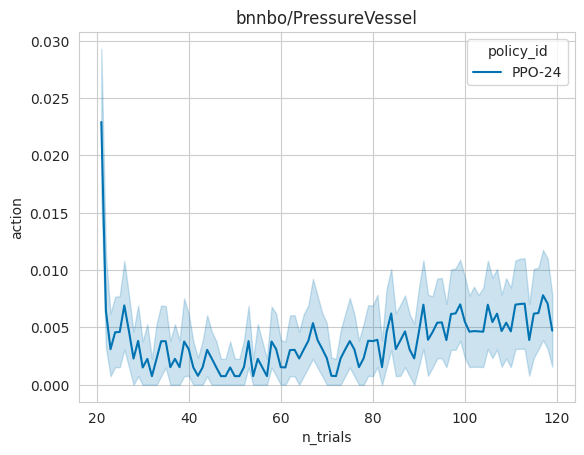

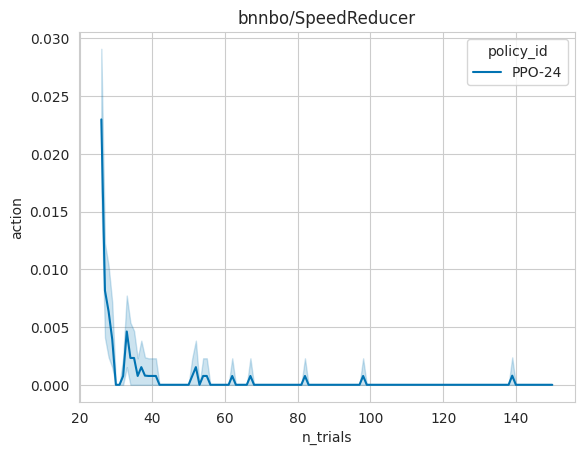

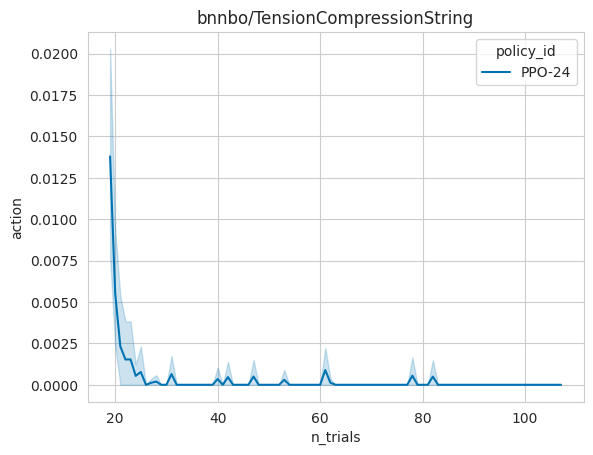

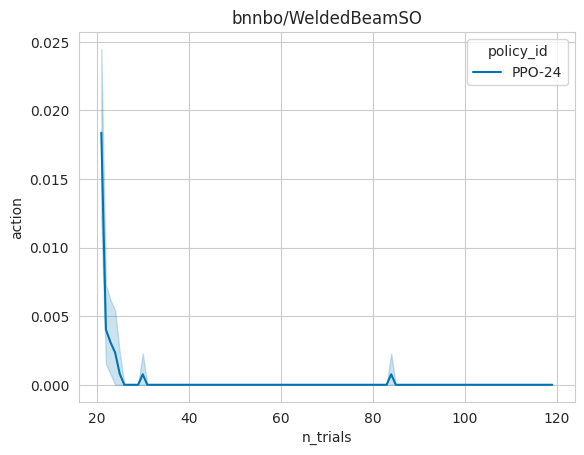

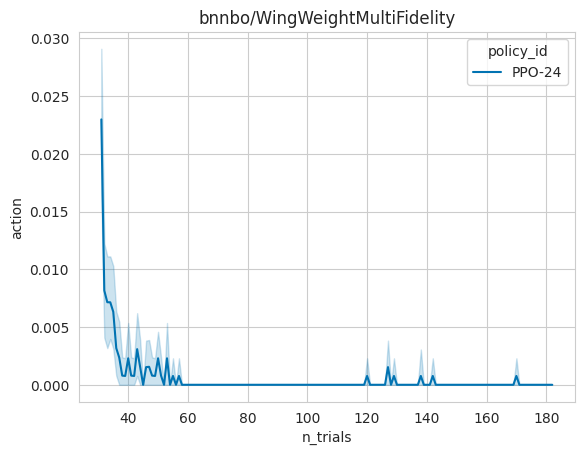

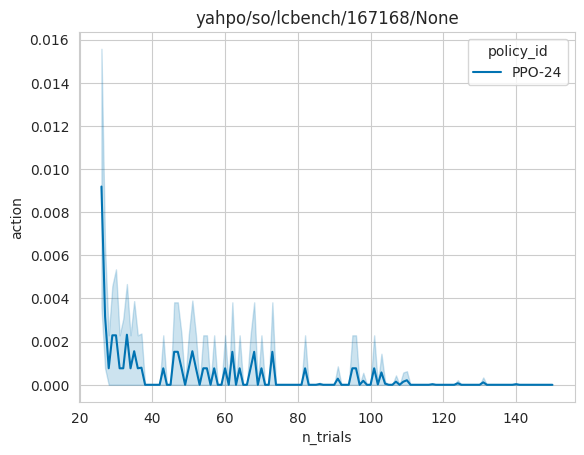

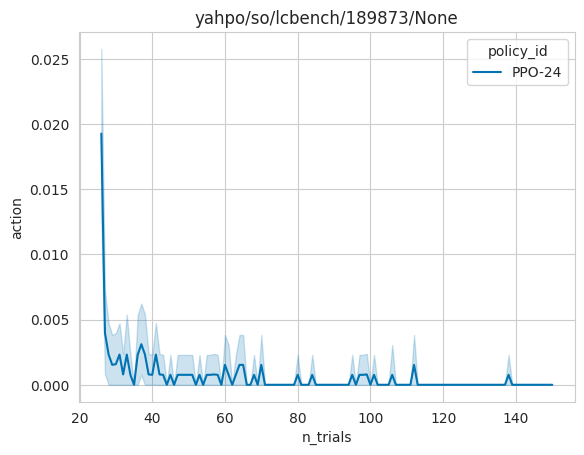

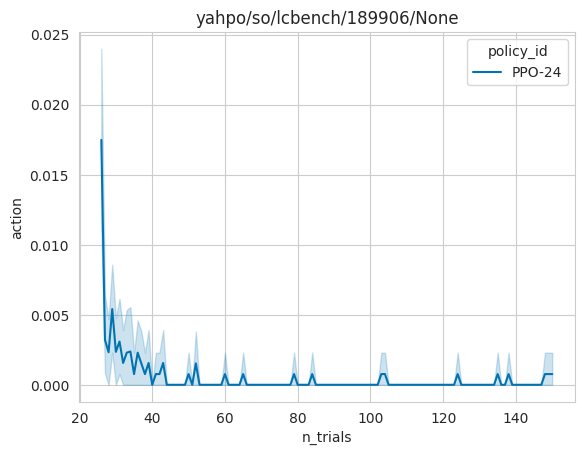

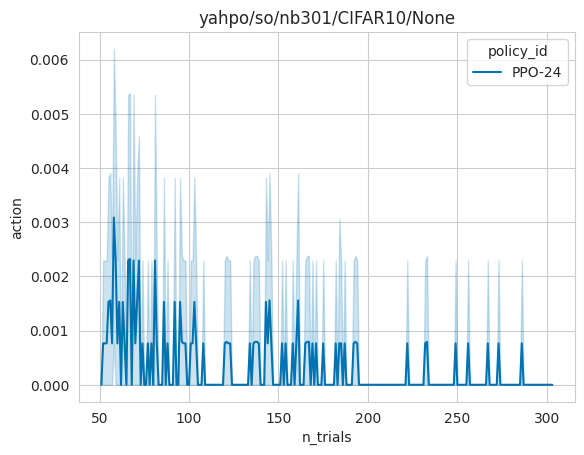

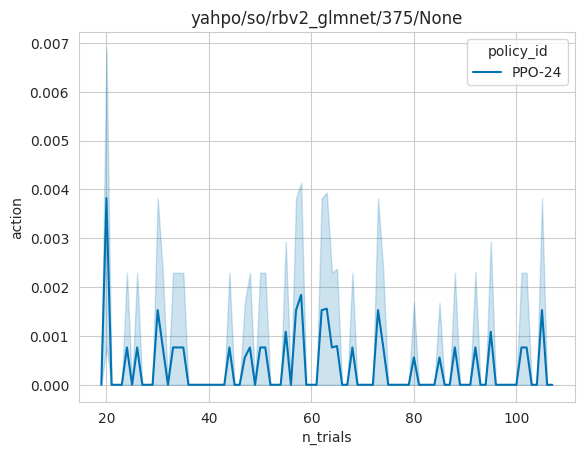

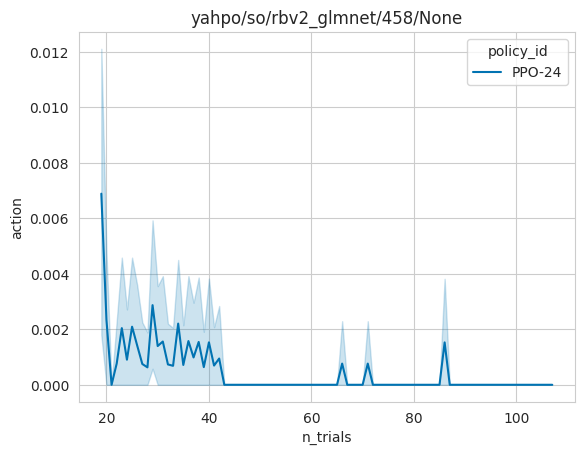

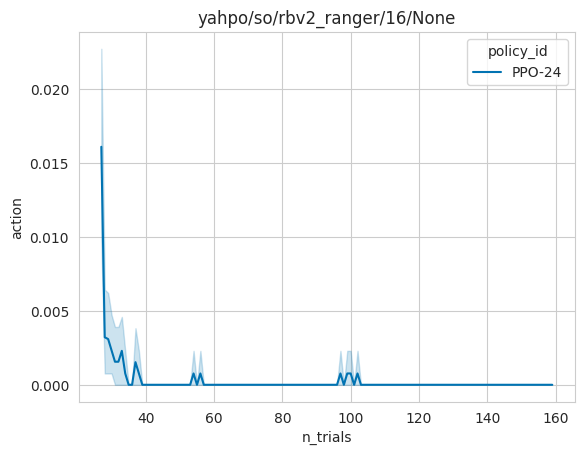

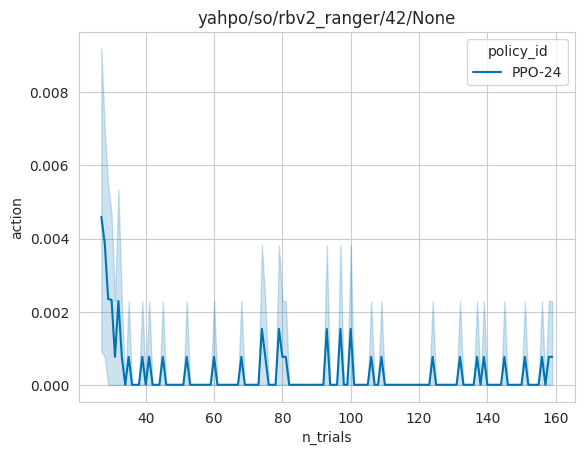

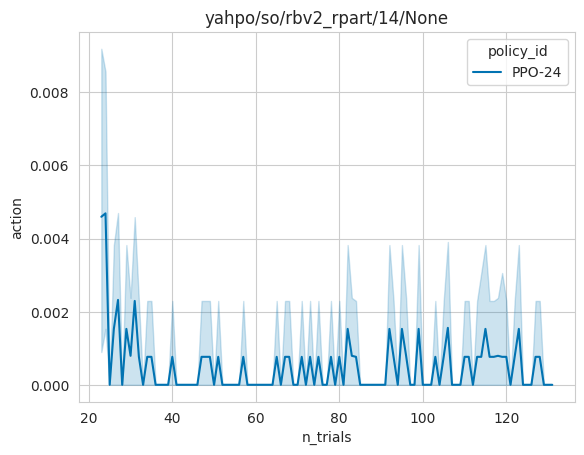

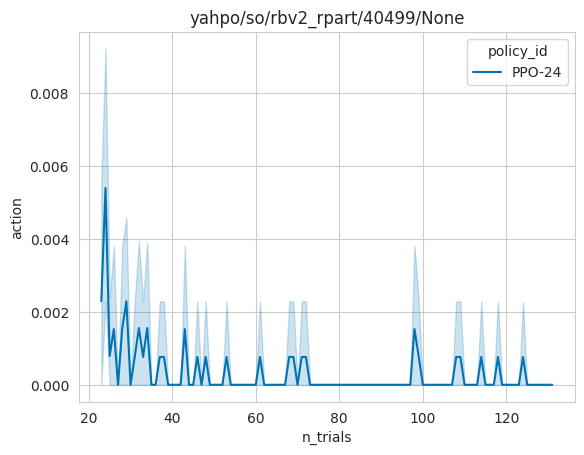

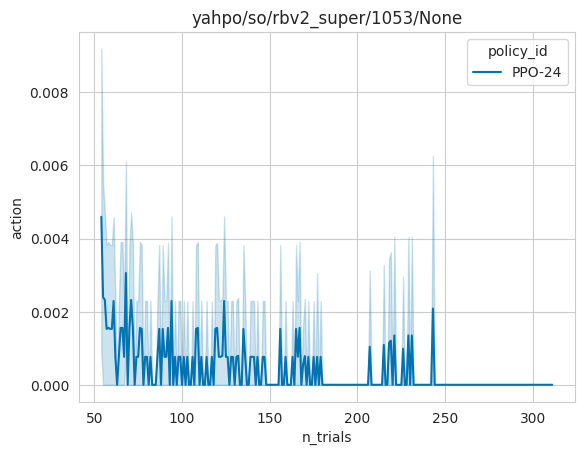

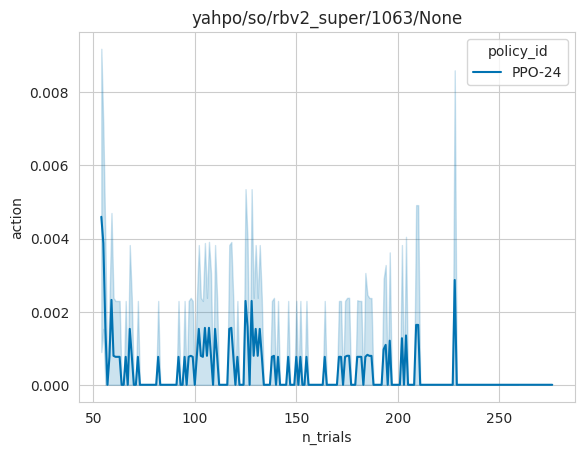

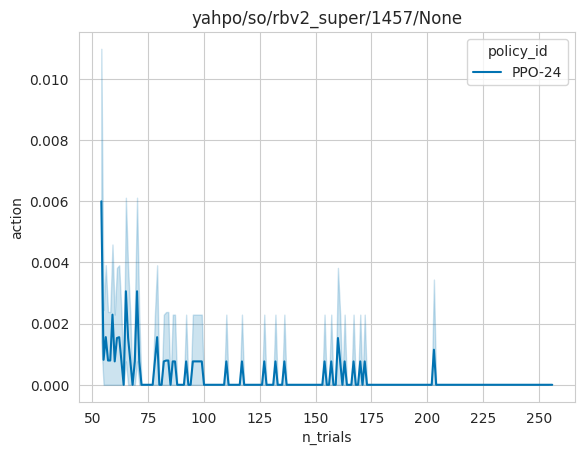

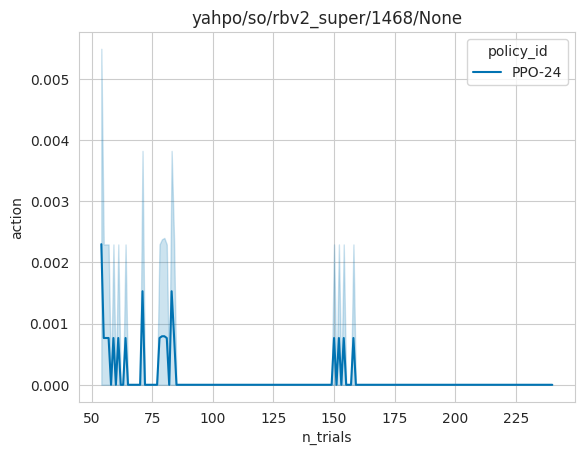

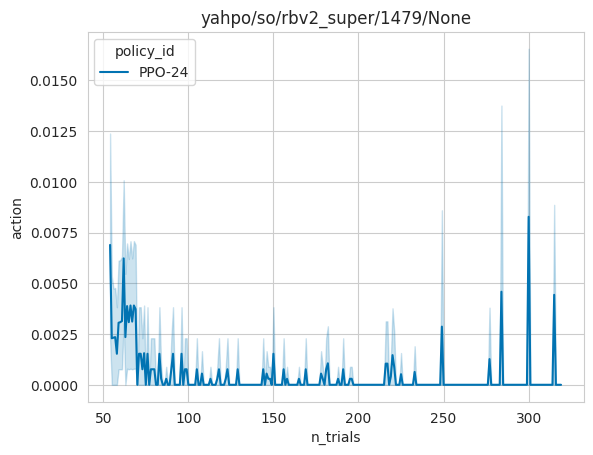

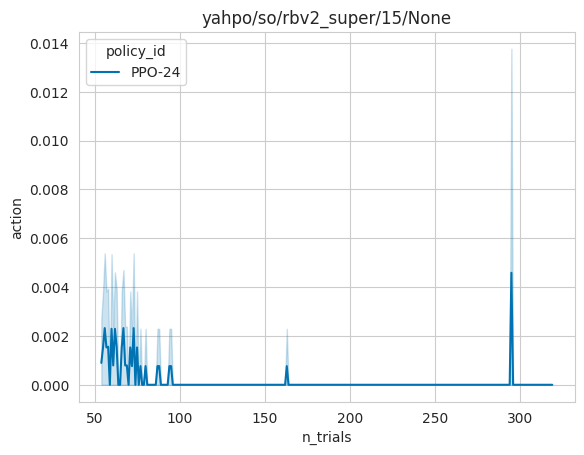

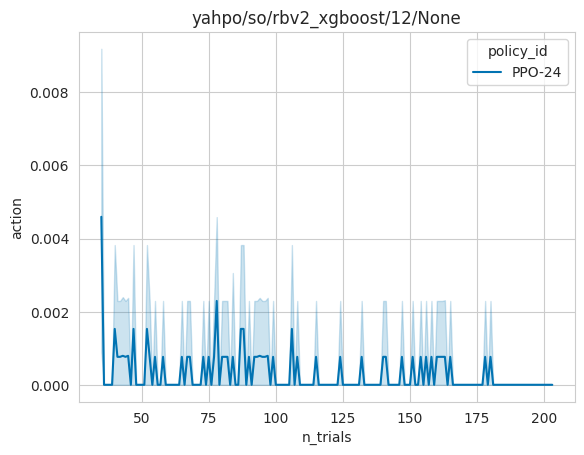

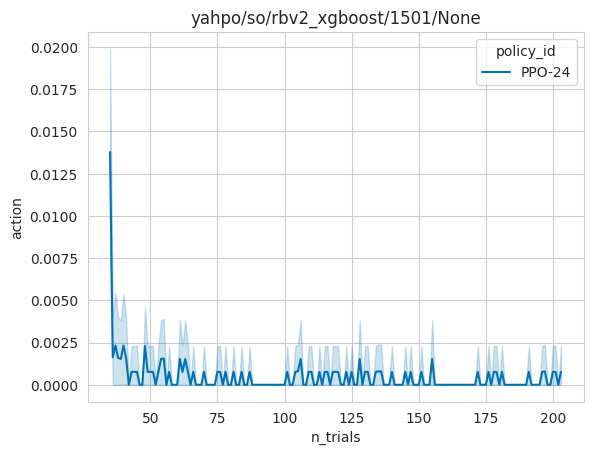

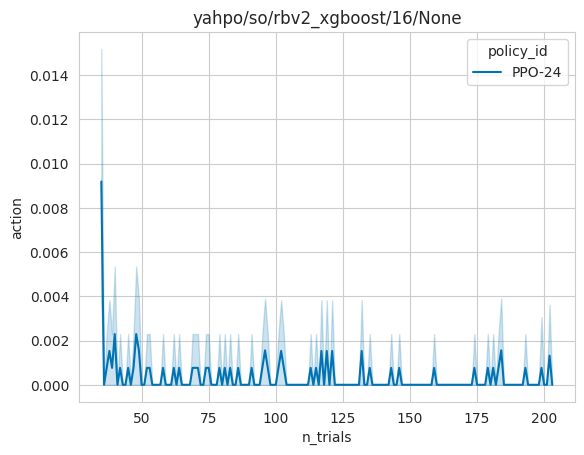

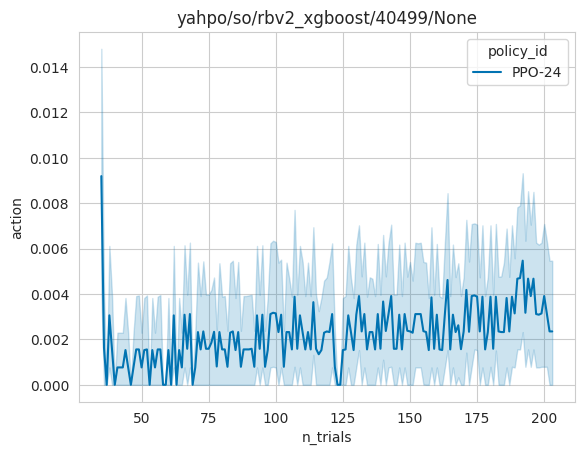

In [4]:
from pathlib import Path
from carps.analysis.gather_data import read_jsonl_content
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from carps.analysis.utils import setup_seaborn
from omegaconf import OmegaConf
from dacboenv.experiment.collect_incumbents import add_metadata_to_dict
from tqdm import tqdm

%matplotlib inline
setup_seaborn()

actions = pd.read_csv("actions.csv")
actions["policy_id"] = actions["policy_id"].map(lambda x: "PPO-fid8" if "fid8" in x else x)
actions["policy_id"] = actions["policy_id"].map(lambda x: "PPO-24" if "AlphaNet" in x else x)

for task_id, gdf in actions.groupby("task_id"):
    ax = sns.lineplot(data=gdf, x="n_trials", y="action", hue="policy_id")
    ax.set_title(task_id)
    plt.show()


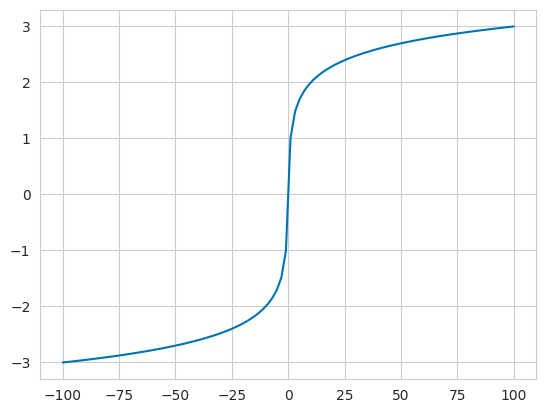

In [5]:
def symlog(x, linthresh=1.0, base=10):
    x = np.asarray(x)
    sign = np.sign(x)
    abs_x = np.abs(x)

    return sign * np.where(
        abs_x <= linthresh,
        abs_x / linthresh,
        1 + np.log(abs_x / linthresh) / np.log(base)
    )

X = np.linspace(-100, 100, 100)
Y = symlog(X)
plt.plot(X, Y)